## Data Discovery of StackOverFlow Annual Developer Survey (2020)
### This notebook analyzes the survey data collected by StackOverFlow (https://insights.stackoverflow.com/survey) to understand the following questions:
#### 1) what are the most popular software used (languages, web framework, databases, platforms, collaborative tools) that may be most useful to learn?
#### 2) what are the relationships between salary, software language, and years of experience to understand how long and which language may lead to higher salaries?
#### 3) what are the distributions of race, gender, and years of experience amongst the developers?

#### Import packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read survey in csv.
df_survey = pd.read_csv('./developer_survey_2020/survey_results_public.csv')
df_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### 1) What are the most popular software used (lanugages, web framework, databases, platforms, collaborative tools)?

In [2]:
def clean_expand_entries(df, column_interest, column_expand=None):
    '''
    Function to drop NaNs and split each data entry by separator ";" into new pandas dataframe.
    
    Args: 
        df - input dataframe.
        column_interest - column_name to clean and split.
    
    Return: df_col - dataframe with entries split into individual entry.
            number_respondents - number of respondents.
    '''
    # drop missing values since interest is in valid survey answers that adds value to analysis. 
    # imputation of data may lead to unintended biases. besides there are still sufficient number 
    # of non-NaN responses even after dropping for analysis to be valid.
    if column_expand is None:
        df = df.dropna(subset=[column_interest], axis=0)
    else:
        columns = [column_interest]
        columns.append(column_expand)
        df = df.dropna(subset=columns, axis=0)
    
    # convert dataframe to list
    df_list = df[column_interest].values.tolist()
    print('Number of non-Nan responses for {} = {}'.format(column_interest, len(df_list)))
    
    # expand by separating ";".
    df_col = pd.DataFrame()
    for index, entry in enumerate(df_list):
        df_expanded = pd.DataFrame(entry.split(";"))
        
        if column_expand is not None:
            df_expanded[column_expand] = df[column_expand].iloc[index]

        df_col = pd.concat([df_col, df_expanded], axis=0)

        # show progress.
        if index % 5000 == 0:
            print('{}/{} rows processed.'.format(index, len(df_list)))
    
    return df_col, len(df_list)

##### **1a) What are the most popular languages used?**
##### The top 3 most popular software languages are JavaScript, HTML/CSS, and SQL, each used by more than 50% of survey respondents.

Number of non-Nan responses for LanguageWorkedWith = 57378
0/57378 rows processed.
5000/57378 rows processed.
10000/57378 rows processed.
15000/57378 rows processed.
20000/57378 rows processed.
25000/57378 rows processed.
30000/57378 rows processed.
35000/57378 rows processed.
40000/57378 rows processed.
45000/57378 rows processed.
50000/57378 rows processed.
55000/57378 rows processed.


Text(0.5, 1.0, 'Popular software languages used')

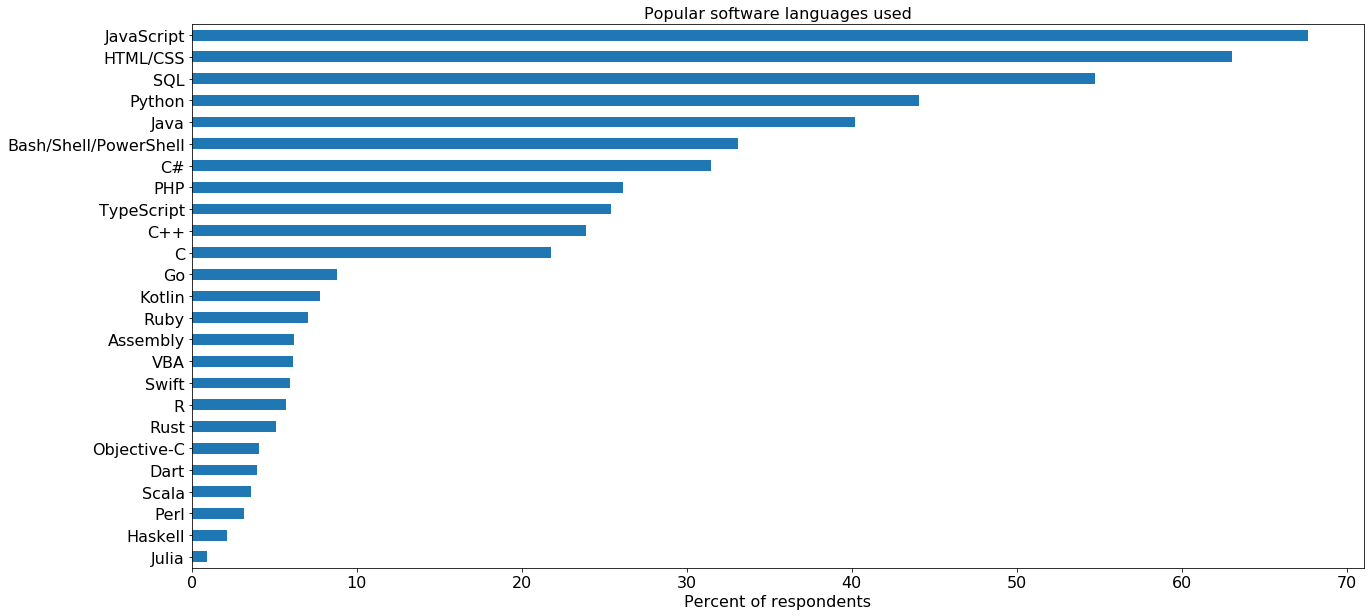

In [3]:
# isolate columns of interest.
workedwith_columns = [columns for columns in df_survey.columns if "WorkedWith" in columns]
df = df_survey[workedwith_columns]

df_col, number_respondents = clean_expand_entries(df, "LanguageWorkedWith")

# plot results.
ax = (df_col[0].value_counts()/number_respondents*100.0).plot(kind="barh", figsize=(21, 10), fontsize=16);
ax.invert_yaxis()
plt.xlabel("Percent of respondents", fontsize=16)
plt.title("Popular software languages used", fontsize=16)
# uncomment to save figure to file
# ax.get_figure().savefig("LanguageWorkedWith.png")

##### **1b) What are the most popular web framework used?**
##### The top 3 in terms of popularity are jQuery, React.js and Angular, with less than 40% of respondents using each.

Number of non-Nan responses for WebframeWorkedWith = 42279
0/42279 rows processed.
5000/42279 rows processed.
10000/42279 rows processed.
15000/42279 rows processed.
20000/42279 rows processed.
25000/42279 rows processed.
30000/42279 rows processed.
35000/42279 rows processed.
40000/42279 rows processed.


Text(0.5, 1.0, 'Popular web frameworks used')

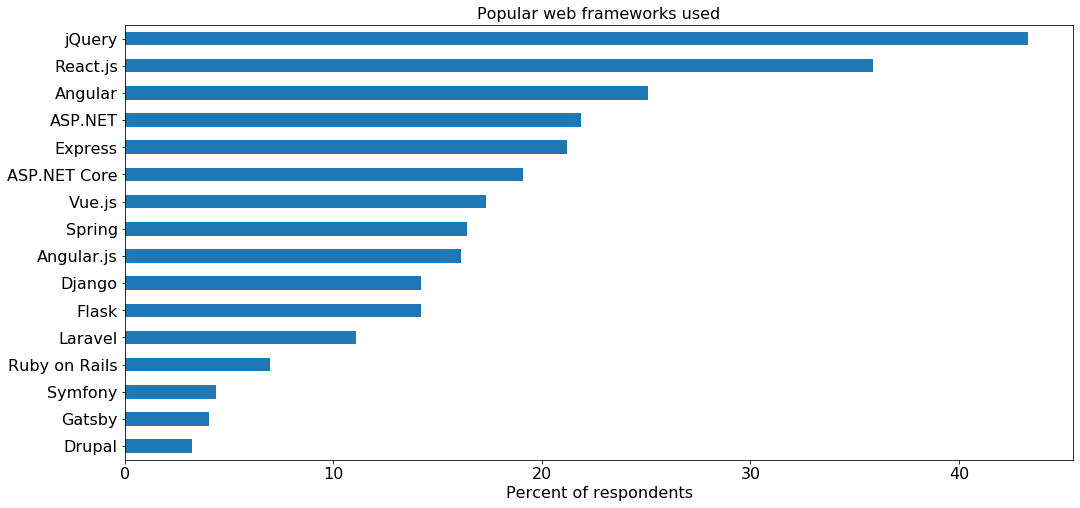

In [4]:
df_col, number_respondents = clean_expand_entries(df, "WebframeWorkedWith")

# plot results.
ax = (df_col[0].value_counts()/number_respondents*100.0).plot(kind="barh", figsize=(17, 8), fontsize=16);
ax.invert_yaxis()
plt.xlabel("Percent of respondents", fontsize=16)
plt.title("Popular web frameworks used", fontsize=16)
# uncomment to save figure to file
# ax.get_figure().savefig("WebframeWorkedWith.png")

##### **1c) What are the most popular databases used?**
##### The top 3 databases used by developers are MySQL, with greater than 50% of respondents, followed by PostgreSQL and Microsoft SQL Server.

Number of non-Nan responses for DatabaseWorkedWith = 49537
0/49537 rows processed.
5000/49537 rows processed.
10000/49537 rows processed.
15000/49537 rows processed.
20000/49537 rows processed.
25000/49537 rows processed.
30000/49537 rows processed.
35000/49537 rows processed.
40000/49537 rows processed.
45000/49537 rows processed.


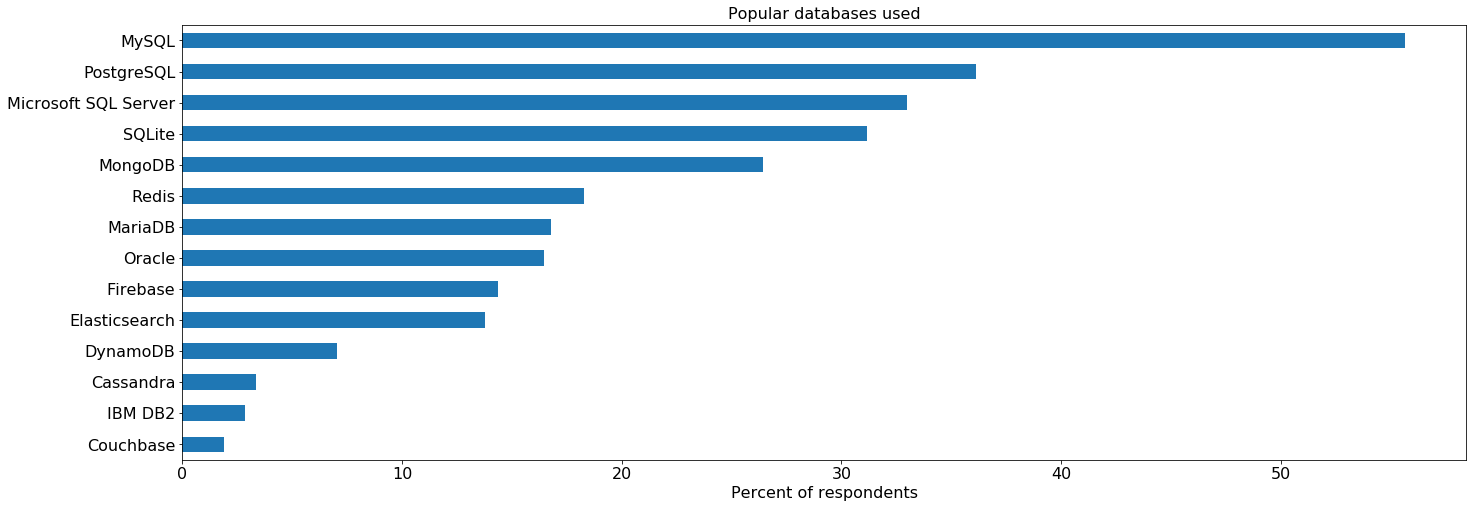

In [5]:
df_col, number_respondents = clean_expand_entries(df, "DatabaseWorkedWith")

# plot results.
ax = (df_col[0].value_counts()/number_respondents*100.0).plot(kind="barh", figsize=(23, 8), fontsize=16);
ax.invert_yaxis()
plt.xlabel("Percent of respondents", fontsize=16);
plt.title("Popular databases used", fontsize=16);
# uncomment to save figure to file
# ax.get_figure().savefig("DatabaseWorkedWith.png")

##### **1d) What are the most popular platforms used?**
##### Linux and Windows are the top 2 most popular platforms, both at over 50% of respondents, while Docker is third with about 35%.

Number of non-Nan responses for PlatformWorkedWith = 53843
0/53843 rows processed.
5000/53843 rows processed.
10000/53843 rows processed.
15000/53843 rows processed.
20000/53843 rows processed.
25000/53843 rows processed.
30000/53843 rows processed.
35000/53843 rows processed.
40000/53843 rows processed.
45000/53843 rows processed.
50000/53843 rows processed.


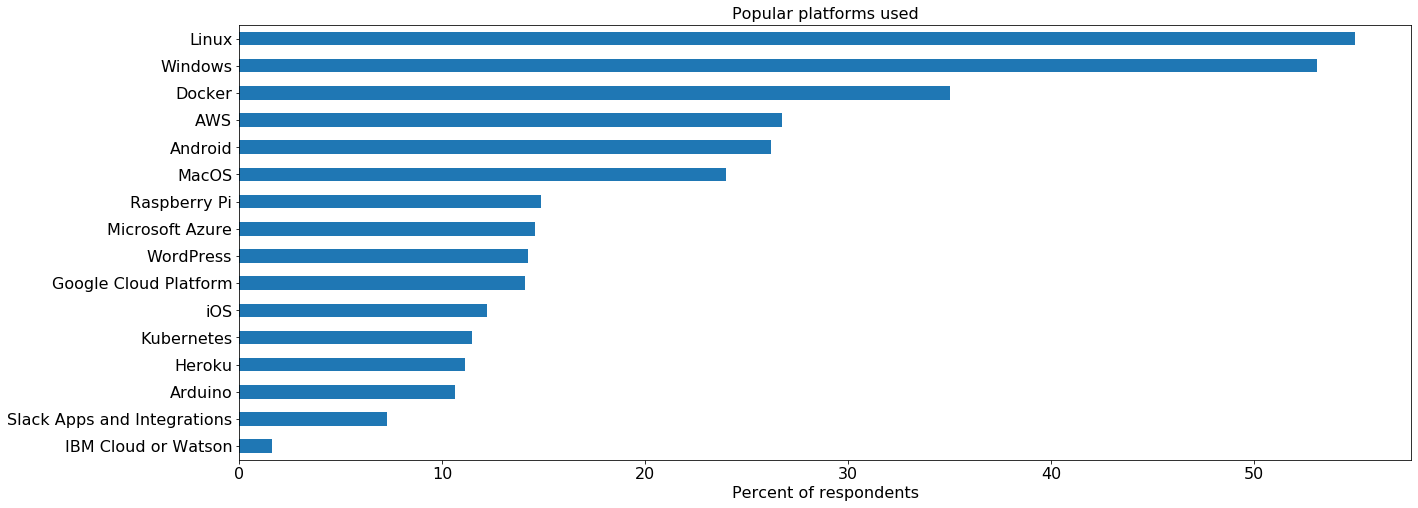

In [6]:
df_col, number_respondents = clean_expand_entries(df, "PlatformWorkedWith")

# plot results.
ax = (df_col[0].value_counts()/number_respondents*100.0).plot(kind="barh", figsize=(21, 8), fontsize=16);
ax.invert_yaxis()
plt.xlabel("Percent of respondents", fontsize=16);
plt.title("Popular platforms used", fontsize=16);
# uncomment to save figure to file
# ax.get_figure().savefig("PlatformWorkedWith.png")

##### **1e) What are the most popular collaborative tools used?**
##### GitHub is the most popular at greater than 80% of respondents, while Slack and Jira are distant second and third at about 50% respondents, respectively.

Number of non-Nan responses for NEWCollabToolsWorkedWith = 52883
0/52883 rows processed.
5000/52883 rows processed.
10000/52883 rows processed.
15000/52883 rows processed.
20000/52883 rows processed.
25000/52883 rows processed.
30000/52883 rows processed.
35000/52883 rows processed.
40000/52883 rows processed.
45000/52883 rows processed.
50000/52883 rows processed.


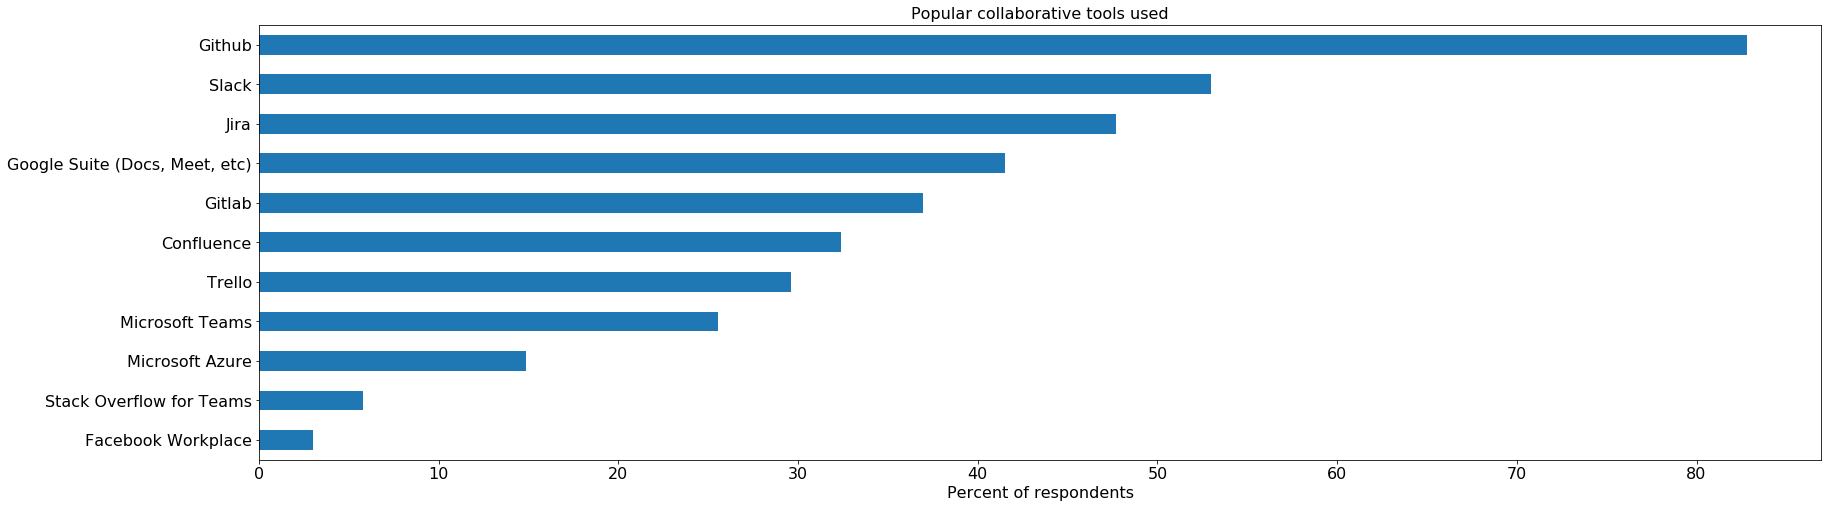

In [7]:
df_col, number_respondents = clean_expand_entries(df, "NEWCollabToolsWorkedWith")

# plot results.
ax = (df_col[0].value_counts()/number_respondents*100.0).plot(kind="barh", figsize=(28, 8), fontsize=16);
ax.invert_yaxis()
plt.xlabel("Percent of respondents", fontsize=16);
plt.title("Popular collaborative tools used", fontsize=16);
# uncomment to save figure to file
# ax.get_figure().savefig("NEWCollabToolsWorkedWith.png")

#### 2) What are the relationships between salary, software language, and years of experience to understand how long and which languages may lead to higher salaries?

In [8]:
# isolate columns of interest.
relations_columns = ['ConvertedComp', 'LanguageWorkedWith', 'YearsCodePro']
df = df_survey[relations_columns]

##### **2a) Relationship between salary and software language.**
##### The highest paid developers use Perl and Scala, while developers proficient in Go and Rust are close third and fourth.

Number of non-Nan responses for LanguageWorkedWith = 33447
0/33447 rows processed.
5000/33447 rows processed.
10000/33447 rows processed.
15000/33447 rows processed.
20000/33447 rows processed.
25000/33447 rows processed.
30000/33447 rows processed.


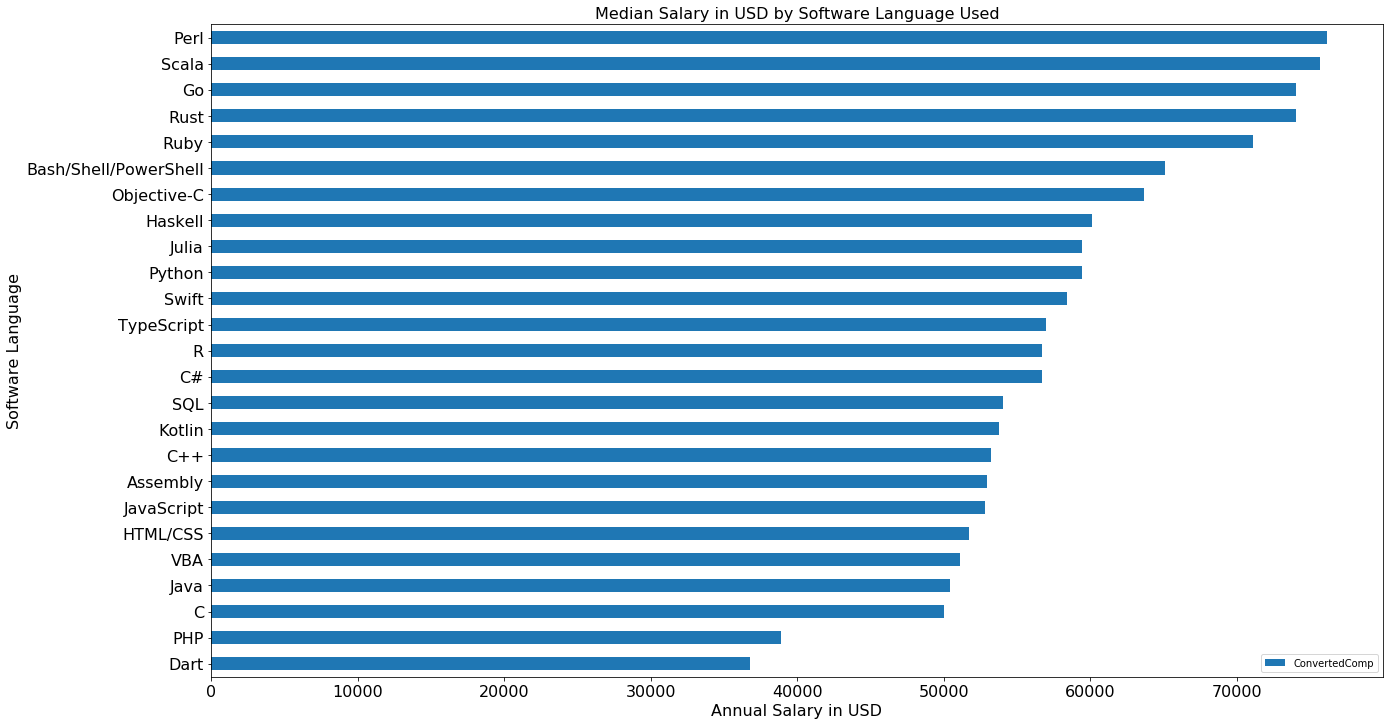

In [9]:
df_col, number_respondents = clean_expand_entries(df, "LanguageWorkedWith", "ConvertedComp")

# plot results.
ax = df_col.groupby(0).median().sort_values(by=['ConvertedComp'], ascending=False).plot(kind="barh", figsize=(21, 12), fontsize=16);
ax.invert_yaxis()
plt.xlabel("Annual Salary in USD", fontsize=16);
plt.ylabel("Software Language", fontsize=16);
plt.title("Median Salary in USD by Software Language Used", fontsize=16);
# uncomment to save figure to file
# ax.get_figure().savefig("topsalary_language.png")

##### **2b) Relationship between salary and years of coding experience.**
##### More programming experience comes with higher median annual salary. Newly minted developers with 5 years or less of experience enjoye the largest increase in salary with each year of professional experience. However, the bump in salary starts to tapper off over time. After 25 years, salary raises are smaller and more inconsistent.

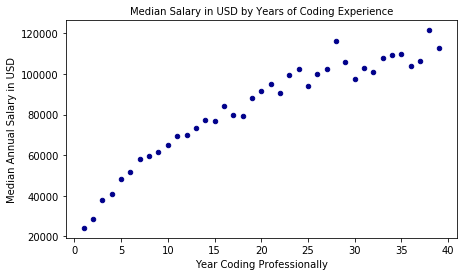

In [10]:
df_group = df[['ConvertedComp', 'YearsCodePro']].groupby('YearsCodePro').median().sort_values(by=['ConvertedComp'], ascending=False).reset_index()
df_group = df_group[df_group['YearsCodePro'].str.contains("year")==False]
df_group = df_group.astype(float)
df_group = df_group[df_group['YearsCodePro'] < 40.0]

# plot results.
ax =df_group.plot.scatter(x='YearsCodePro', y='ConvertedComp', c='DarkBlue', figsize=(7, 4), fontsize=10)
plt.ylabel("Median Annual Salary in USD", fontsize=10);
plt.xlabel("Year Coding Professionally", fontsize=10);
plt.title("Median Salary in USD by Years of Coding Experience", fontsize=10);
# uncomment to save figure to file
# ax.get_figure().savefig("salary_vs_years.png")

#### 3) What are the distributions of race, gender, and years of experience amongst the developers?

In [11]:
# isolate columns of interest.
relations_columns = ['Gender', 'Ethnicity', 'YearsCodePro', 'ConvertedComp']
df = df_survey[relations_columns]

# drop extremes in years of coding experience - 'Less than 1 year' and 'More than 50 years'.
df = df[df['YearsCodePro'].str.contains("year")==False]

# convert years of coding and salary to float.
df[['YearsCodePro', 'ConvertedComp']] = df[['YearsCodePro', 'ConvertedComp']].astype(float)

##### **3a) What is the gender distribution of respondents?**
##### The gender divide is great with 9 times more male developers than female.

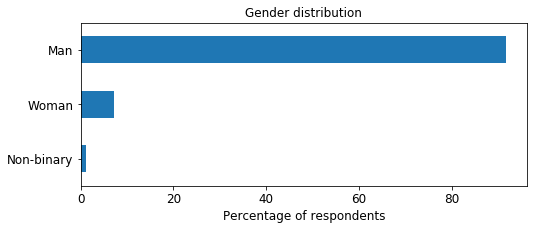

In [12]:
# drop missing values and sum all other categories within 'Non-binary'.
df_col = df['Gender'].dropna(axis=0)
df_col = df_col.value_counts()/df_col.shape[0]*100.0
df_col['Non-binary'] = sum(df_col[2:])
df_col = df_col.drop(df_col.index[2:7])

# plot results.
ax = df_col.plot(kind="barh", figsize=(8, 3), fontsize=12);
ax.invert_yaxis()
plt.xlabel("Percentage of respondents", fontsize=12);
plt.title("Gender distribution", fontsize=12);
# uncomment to save figure to file
# ax.get_figure().savefig("gender.png")

##### **3b) What is the ethnicity distribution of respondents?**
##### There are at least 6 times more White developers than the next highest demographic, South Asian.

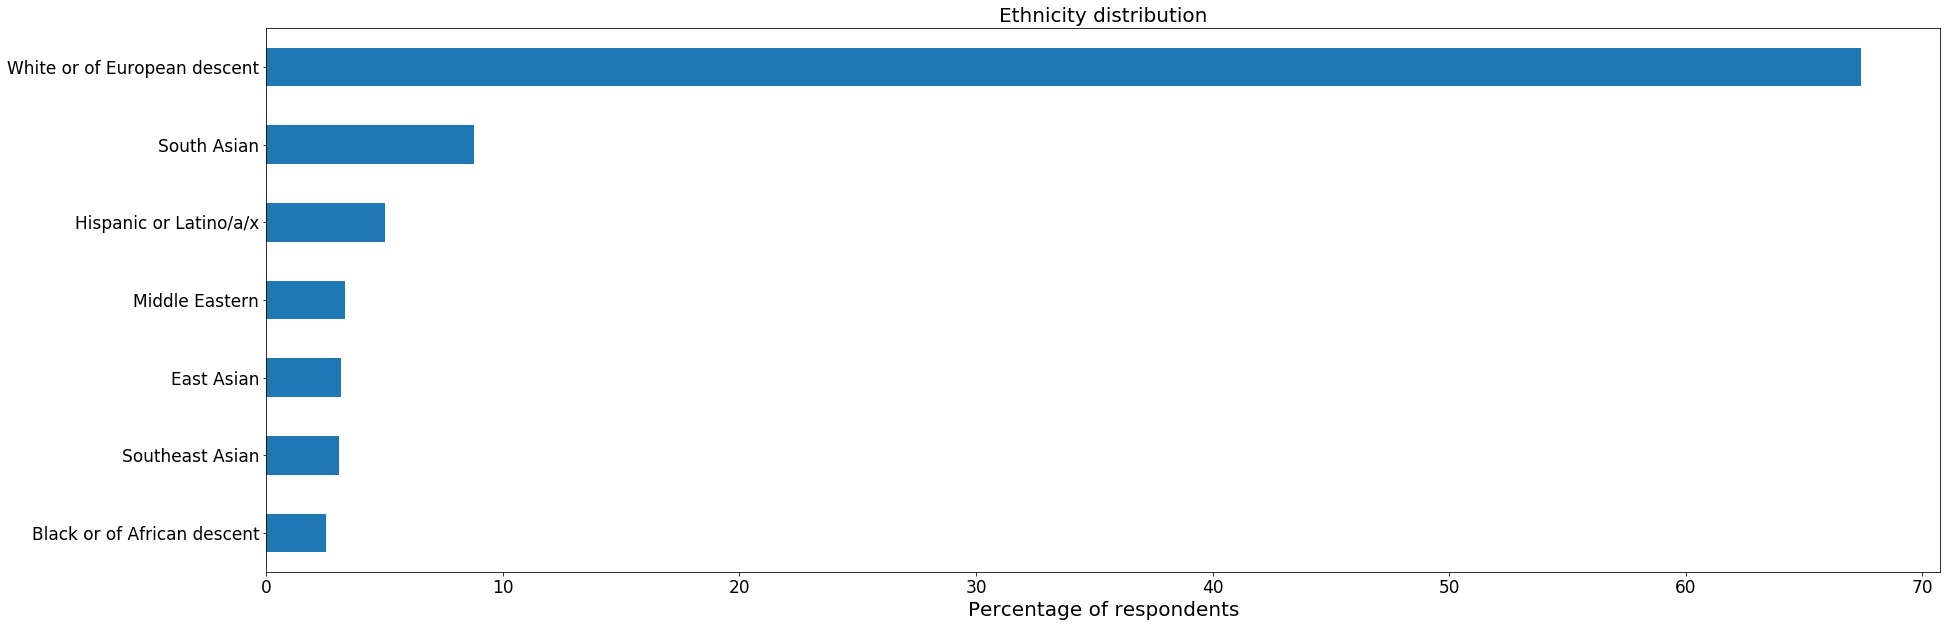

In [13]:
# drop missing valyes and isolate just the first 7 major ethnicities, the rest are less than 0.1%.
df_col = df['Ethnicity'].dropna(axis=0)
df_col = df_col.value_counts()/df_col.shape[0]*100.0
df_col = df_col.drop(df_col.index[7:])

# plot results.
ax = df_col.plot(kind="barh", figsize=(30, 10), fontsize=17);
ax.invert_yaxis()
plt.xlabel("Percentage of respondents", fontsize=20);
plt.title("Ethnicity distribution", fontsize=20);
# uncomment to save figure to file
# ax.get_figure().savefig("ethnicity.png")

##### **3c) Differences in years of coding experience between male and female.**
##### The fraction of new developers with less than 5 years of experience started of higher for female than male. However, over time, the fraction of more experienced female developers fell greater than that for male. More female developers drop out of the field after 10 years.

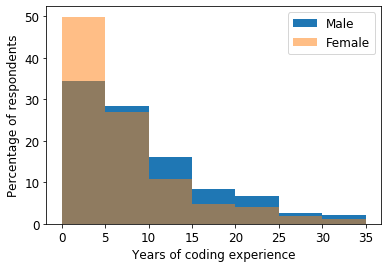

In [14]:
# isolate the bin years each 5 years interval
bins_years = list(range(0,40, 5))

# isolate the years of coding experience for male
df_male = df[['YearsCodePro', 'Gender']]
df_male = df_male[df_male['Gender'] == "Man"]

# isolate the years of coding experience for female
df_female = df[['YearsCodePro', 'Gender']]
df_female = df_female[df_female['Gender'] == "Woman"]

# plot results.
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(6, 4))
plt.hist(df_male['YearsCodePro'], bins=bins_years, alpha=1.0, label="Male", weights = np.ones_like(df_male.index) / len(df_male.index)*100);
plt.hist(df_female['YearsCodePro'], bins=bins_years, alpha=0.5, label="Female", weights = np.ones_like(df_female.index) / len(df_female.index)*100);
plt.xlabel("Years of coding experience");
plt.ylabel("Percentage of respondents");
plt.legend();
# uncomment to save figure to file
# plt.savefig("years_experience_vs_gender.png")